# Importing required packages

In [39]:
import matplotlib.pyplot as plt
import os
import scipy.io
import random

# Data quantization

In [37]:
def count_data(data_list, label):
    """
    Counts the number of label's data in a list 

    Args:
        data_list (list): A list of data path.

    Returns:
        tuple: A tuple containing the count of label's data and a list of those data.
    """
    label_data = []
    for data in data_list:
        if data.startswith(label):
            label_data.append(data)
    return len(label_data), label_data

In [38]:
data_path = "dataset/Images"
train_split = scipy.io.loadmat('dataset/train_list.mat')
test_split = scipy.io.loadmat('dataset/test_list.mat')
train_files = [i[0][0] for i in train_split['file_list']]
test_files = [i[0][0] for i in test_split['file_list']]

# Get the class names from the folder names in the training dataset path
class_names = os.listdir(data_path)

train_data_counts, test_data_counts = [], []
for class_name in class_names:
    train_count = count_data(train_files, class_name)[0]
    test_count = count_data(test_files, class_name)[0]
    
    train_data_counts.append(train_count)
    test_data_counts.append(test_count)

# Print the count of data in each class
for i, class_name in enumerate(class_names):
    print(f"Class: {class_name} | Train Count: {train_data_counts[i]} | Test Count: {test_data_counts[i]}")

Class: n02085620-Chihuahua | Train Count: 100 | Test Count: 52
Class: n02085782-Japanese_spaniel | Train Count: 100 | Test Count: 85
Class: n02085936-Maltese_dog | Train Count: 100 | Test Count: 152
Class: n02086079-Pekinese | Train Count: 100 | Test Count: 49
Class: n02086240-Shih-Tzu | Train Count: 100 | Test Count: 114
Class: n02086646-Blenheim_spaniel | Train Count: 100 | Test Count: 88
Class: n02086910-papillon | Train Count: 100 | Test Count: 96
Class: n02087046-toy_terrier | Train Count: 100 | Test Count: 72
Class: n02087394-Rhodesian_ridgeback | Train Count: 100 | Test Count: 72
Class: n02088094-Afghan_hound | Train Count: 100 | Test Count: 139
Class: n02088238-basset | Train Count: 100 | Test Count: 75
Class: n02088364-beagle | Train Count: 100 | Test Count: 95
Class: n02088466-bloodhound | Train Count: 100 | Test Count: 87
Class: n02088632-bluetick | Train Count: 100 | Test Count: 71
Class: n02089078-black-and-tan_coonhound | Train Count: 100 | Test Count: 59
Class: n02089867

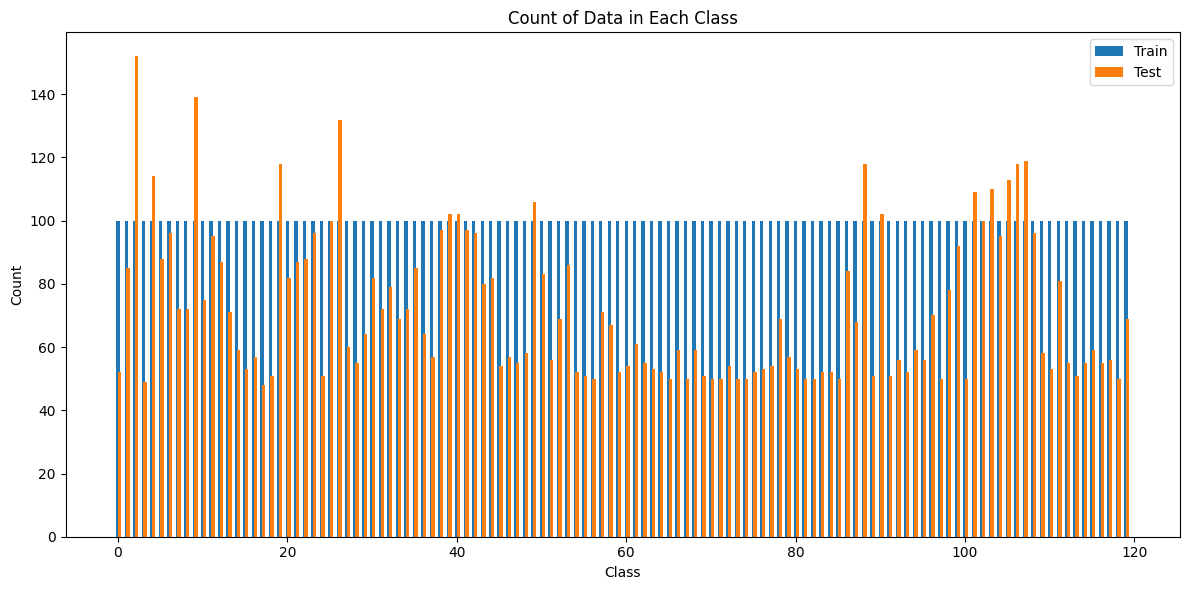

In [36]:
# Plot the count of data in each class
fig, axs = plt.subplots(figsize=(12, 6))
x = range(len(class_names))

plt.bar(x, train_data_counts, width=0.4, align='center', label='Train')
plt.bar(x, test_data_counts, width=0.4, align='edge', label='Test')

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of Data in Each Class')
# plt.xticks(x, class_names, rotation='vertical')
plt.legend()
plt.tight_layout()
plt.show()

# Plot sample

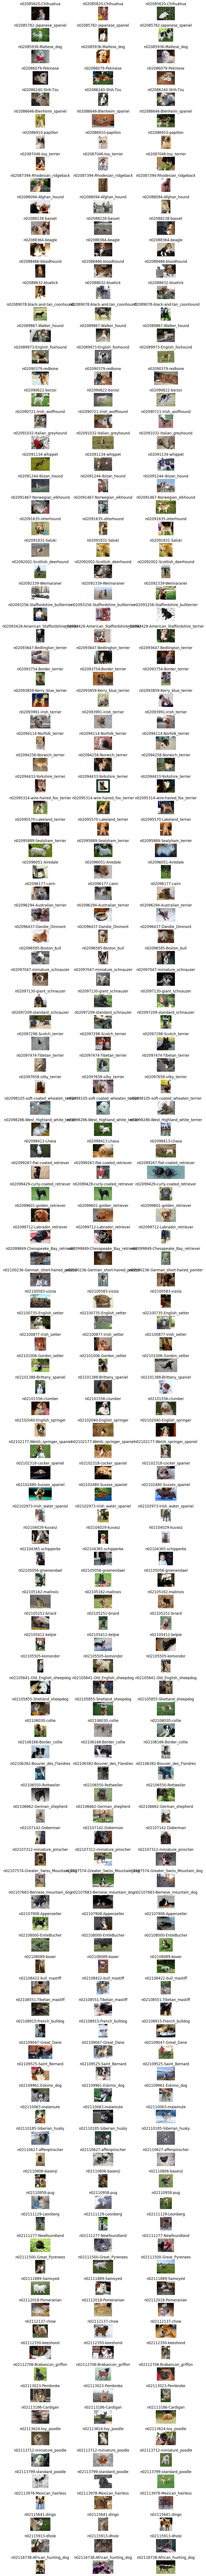

In [44]:
# Plot a sample image from each class
num_samples = 3  # Number of samples to plot per class
fig, axs = plt.subplots(len(class_names), num_samples, figsize=(10, 120))

for i, class_name in enumerate(class_names):
    data_path = "dataset/Images"
    train_class_images = count_data(train_files, class_name)[1]
    
    for j in range(num_samples):
        sample_image = random.choice(train_class_images)
        image_path = os.path.join(data_path, sample_image)
        image = plt.imread(image_path)
        
        if num_samples == 1:
            axs[i].imshow(image)
            axs[i].axis('off')
            axs[i].set_title(class_name)
        else:
            axs[i, j].imshow(image)
            axs[i, j].axis('off')
            axs[i, j].set_title(class_name)

plt.tight_layout()
plt.show()